In [9]:
import pandas as pd 
import tensorflow as tf 
from matplotlib import pyplot as plt 


In [10]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [5]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [17]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 413ms/step - loss: 128.2503 - root_mean_squared_error: 11.3248
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 122.4286 - root_mean_squared_error: 11.0647
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 118.3362 - root_mean_squared_error: 10.8782
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 114.9864 - root_mean_squared_error: 10.7232
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 112.0687 - root_mean_squared_error: 10.5862
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 109.4394 - root_mean_squared_error: 10.4613
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 107.0190 - root_mean_squared_error: 10.3450
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 104.7581 - root_mean_squared_error: 10.2351
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 102.6235 - root_

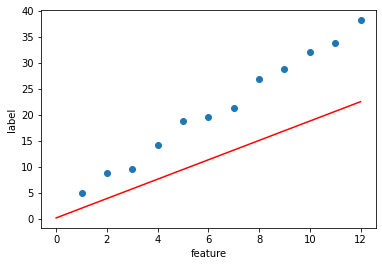

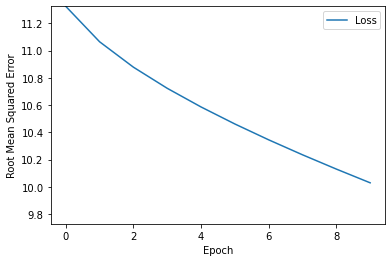

In [22]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

677
Epoch 276/450
1/1 [==============================] - 0s 3ms/step - loss: 37.1486 - root_mean_squared_error: 6.0950
Epoch 277/450
1/1 [==============================] - 0s 4ms/step - loss: 36.2691 - root_mean_squared_error: 6.0224
Epoch 278/450
1/1 [==============================] - 0s 2ms/step - loss: 35.4015 - root_mean_squared_error: 5.9499
Epoch 279/450
1/1 [==============================] - 0s 4ms/step - loss: 34.5459 - root_mean_squared_error: 5.8776
Epoch 280/450
1/1 [==============================] - 0s 3ms/step - loss: 33.7023 - root_mean_squared_error: 5.8054
Epoch 281/450
1/1 [==============================] - 0s 4ms/step - loss: 32.8706 - root_mean_squared_error: 5.7333
Epoch 282/450
1/1 [==============================] - 0s 3ms/step - loss: 32.0508 - root_mean_squared_error: 5.6613
Epoch 283/450
1/1 [==============================] - 0s 5ms/step - loss: 31.2429 - root_mean_squared_error: 5.5895
Epoch 284/450
1/1 [==============================] - 0s 4ms/step - loss: 30.

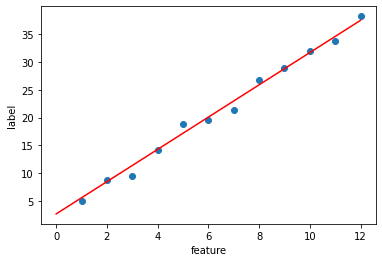

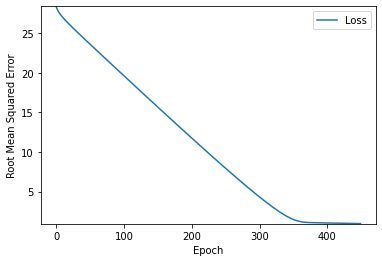

In [25]:
learning_rate=0.01
# Increasing the No. of Epochs
epochs=450
# This flattens out our curve, suggesting our model has trained sufficiently
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 215ms/step - loss: 201.3951 - root_mean_squared_error: 14.1914
Epoch 2/70
1/1 [==============================] - 0s 3ms/step - loss: 111.2485 - root_mean_squared_error: 10.5474
Epoch 3/70
1/1 [==============================] - 0s 2ms/step - loss: 69.0183 - root_mean_squared_error: 8.3077
Epoch 4/70
1/1 [==============================] - 0s 3ms/step - loss: 44.3642 - root_mean_squared_error: 6.6606
Epoch 5/70
1/1 [==============================] - 0s 3ms/step - loss: 28.8529 - root_mean_squared_error: 5.3715
Epoch 6/70
1/1 [==============================] - 0s 2ms/step - loss: 18.7996 - root_mean_squared_error: 4.3358
Epoch 7/70
1/1 [==============================] - 0s 3ms/step - loss: 12.2273 - root_mean_squared_error: 3.4968
Epoch 8/70
1/1 [==============================] - 0s 3ms/step - loss: 7.9467 - root_mean_squared_error: 2.8190
Epoch 9/70
1/1 [==============================] - 0s 3ms/step - loss: 5.1921 - root_mean_squared_er

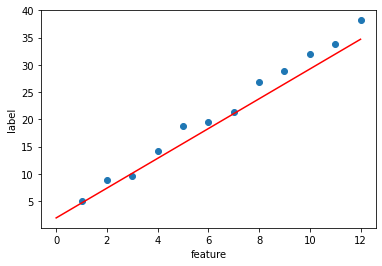

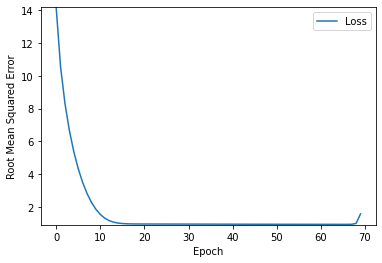

In [26]:
# Applying The Ideal Learning Rate and Epochs, so the we can get our ideal model in less time, with higher learning rate and less epochs
learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
12/12 [==============================] - 0s 725us/step - loss: 115.9712 - root_mean_squared_error: 10.7380
Epoch 2/125
12/12 [==============================] - 0s 725us/step - loss: 53.0599 - root_mean_squared_error: 7.2221
Epoch 3/125
12/12 [==============================] - 0s 725us/step - loss: 20.3829 - root_mean_squared_error: 4.4617
Epoch 4/125
12/12 [==============================] - 0s 725us/step - loss: 3.7945 - root_mean_squared_error: 1.9338
Epoch 5/125
12/12 [==============================] - 0s 547us/step - loss: 1.0394 - root_mean_squared_error: 1.0075
Epoch 6/125
12/12 [==============================] - 0s 544us/step - loss: 0.5653 - root_mean_squared_error: 0.7236
Epoch 7/125
12/12 [==============================] - 0s 631us/step - loss: 0.7869 - root_mean_squared_error: 0.8637
Epoch 8/125
12/12 [==============================] - 0s 635us/step - loss: 1.8312 - root_mean_squared_error: 1.3306
Epoch 9/125
12/12 [==============================] - 0s 544us/step 

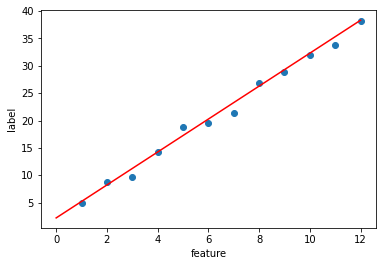

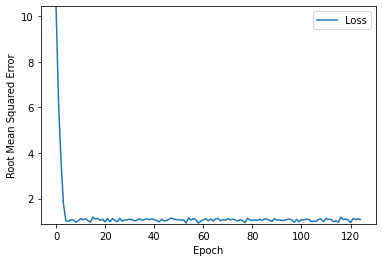

In [27]:
# Now, we will decrease the batch size, as the model might actually train faster on smaller batches. 
# Therefore, after Hyperparameter tuning our dataset, we get our trained model in the least amount of time. 
learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
"""You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
If the training loss does not converge, train for more epochs.
If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.
Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.  """